## Data Preprocessing

In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

In [130]:
# Run the data preprocessing notebook
data = pd.read_csv('docs/anxiety_attack_dataset.csv')

In [51]:
# There are not duplicated rows in the dataset
data.duplicated().value_counts()

False    12000
Name: count, dtype: int64

In [97]:
# There are not Na's in the data
for column in data:
    print(data[column].isna().value_counts())
    print(" ")


ID
False    12000
Name: count, dtype: int64
 
Age
False    12000
Name: count, dtype: int64
 
Gender
False    12000
Name: count, dtype: int64
 
Occupation
False    12000
Name: count, dtype: int64
 
Sleep Hours
False    12000
Name: count, dtype: int64
 
Physical Activity (hrs/week)
False    12000
Name: count, dtype: int64
 
Caffeine Intake (mg/day)
False    12000
Name: count, dtype: int64
 
Alcohol Consumption (drinks/week)
False    12000
Name: count, dtype: int64
 
Smoking
False    12000
Name: count, dtype: int64
 
Family History of Anxiety
False    12000
Name: count, dtype: int64
 
Stress Level (1-10)
False    12000
Name: count, dtype: int64
 
Heart Rate (bpm during attack)
False    12000
Name: count, dtype: int64
 
Breathing Rate (breaths/min)
False    12000
Name: count, dtype: int64
 
Sweating Level (1-5)
False    12000
Name: count, dtype: int64
 
Dizziness
False    12000
Name: count, dtype: int64
 
Medication
False    12000
Name: count, dtype: int64
 
Therapy Sessions (per month)
Fa

#### Diego's preprocessing

In [13]:
# Dizinness (Yes/No)
print("We replace the values of the Dizziness feature with 1 for Yes and 0 for No")
data['Dizziness'] = data['Dizziness'].replace('Yes', 1)
data['Dizziness'] = data['Dizziness'].replace('No', 0)

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print(" ")
print("Class imbalance for the Dizziness feature")
print(data['Dizziness'].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Dizziness feature with 1 for Yes and 0 for No
 
Class imbalance for the Dizziness feature
Dizziness
0    0.7005
1    0.2995
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


In [15]:
# Medication (Yes(No)
print("We replace the values of the Medication feature with 1 for Yes and 0 for No")
data['Medication'] = data['Medication'].replace('Yes', 1)
data['Medication'] = data['Medication'].replace('No', 0)

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print(" ")
print("Class imbalance for the Medication feature")
print(data['Medication'].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Medication feature with 1 for Yes and 0 for No
 
Class imbalance for the Medication feature
Medication
0    0.800417
1    0.199583
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


The distribution of the Therapy Sessions (per month) feature
count    12000.000000
mean         4.518417
std          2.866010
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Therapy Sessions (per month), dtype: float64
 
We check for outliers in the Therapy Sessions (per month) feature


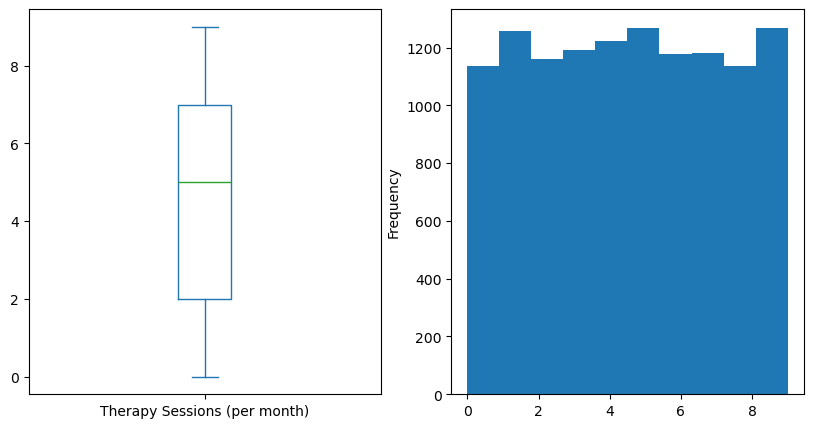

2.0
7.0


In [55]:
# Therapy Sessions (per month) (numerical variable)
# We check the distribution of the variable
print("The distribution of the Therapy Sessions (per month) feature")
print(data['Therapy Sessions (per month)'].describe())

# Check outliers
print(" ")
print("We check for outliers in the Therapy Sessions (per month) feature")

# boxplot and histogram 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['Therapy Sessions (per month)'].plot(kind='box')
plt.subplot(1, 2, 2)
data['Therapy Sessions (per month)'].plot(kind='hist')
plt.show()

print(data['Therapy Sessions (per month)'].quantile(0.25))
print(data['Therapy Sessions (per month)'].quantile(0.75))

# There are no outliers in the Therapy Sessions (per month) feature

# Normalize the variable
data['Therapy Sessions (per month)'] = (data['Therapy Sessions (per month)'] - data['Therapy Sessions (per month)'].mean()) / data['Therapy Sessions (per month)'].std()

In [17]:
# Recent Major Life Event (Yes/No)
print("We replace the values of the Recent Major Life Event feature with 1 for Yes and 0 for No")
data['Recent Major Life Event'] = data['Recent Major Life Event'].replace('Yes', 1)
data['Recent Major Life Event'] = data['Recent Major Life Event'].replace('No', 0)

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print(" ")
print("Class imbalance for the Recent Major Life Event feature")
print(data['Recent Major Life Event'].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Recent Major Life Event feature with 1 for Yes and 0 for No
 
Class imbalance for the Recent Major Life Event feature
Recent Major Life Event
0    0.7545
1    0.2455
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


In [57]:
# Diet quality (1-10) (Numerical variable)
# We check the distribution of the variable
print("The distribution of the Diet quality (1-10) feature")
print(data['Diet Quality (1-10)'].describe())

# There are no outliers in the Diet Quality (1-10) feature since all values go from 1 to 10

# Check class imbalance
print(" ")
print("We check for class imbalance in the Diet Quality (1-10) feature")
print(data['Diet Quality (1-10)'].value_counts(normalize=True))
print("We can see that the classes are completely balanced")

# Normalize the variable
data['Diet Quality (1-10)'] = (data['Diet Quality (1-10)'] - data['Diet Quality (1-10)'].mean()) / data['Diet Quality (1-10)'].std()

The distribution of the Diet quality (1-10) feature
count    12000.000000
mean         5.497333
std          2.867579
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Diet Quality (1-10), dtype: float64
 
We check for class imbalance in the Diet Quality (1-10) feature
Diet Quality (1-10)
2     0.103667
5     0.102417
3     0.102083
6     0.101500
10    0.101250
8     0.099000
9     0.098417
7     0.098167
4     0.097250
1     0.096250
Name: proportion, dtype: float64
We can see that the classes are completely balanced


#### Daniel's preprocessing

Occupation, Caffeine Intake (mg/day), Alcohol Consumption (drinks/week), Smoking

###### ocupation

In [75]:
# Display all unique values in the 'Occupation' column
print("Unique occupations in the dataset:")
unique_occupations = data['Occupation'].unique()
print(unique_occupations)

# Apply one-hot encoding to the 'Occupation' column
# One-hot encoding converts categorical data into binary columns for each category.
encoder = OneHotEncoder(sparse_output=False, drop='first') 
occupation_encoded = encoder.fit_transform(data[['Occupation']])

#Create a DataFrame for the encoded occupation data
encoded_columns = encoder.get_feature_names_out(['Occupation'])
occupation_df = pd.DataFrame(occupation_encoded, columns=encoded_columns)

# Add the encoded columns back to the original dataset and drop the original column
data = pd.concat([data, occupation_df], axis=1)
data.drop(columns=['Occupation'], inplace=True)

# Display the updated dataset structure
print("\nUpdated dataset with encoded 'Occupation'")
#print(data.head())

Unique occupations in the dataset:


KeyError: 'Occupation'

###### smoking

In [21]:
# Check for class imbalance in categorical columns (e.g., Smoking)
print("Class distribution for 'Smoking':")
print(data['Smoking'].value_counts(normalize=True))  # Percentage distribution
# Map 'Smoking' values to binary integers
data['Smoking'] = data['Smoking'].map({'Yes': 1, 'No': 0})

Class distribution for 'Smoking':
Smoking
0    0.701417
1    0.298583
Name: proportion, dtype: float64


###### Caffeine Intake and Alcohol Consumption

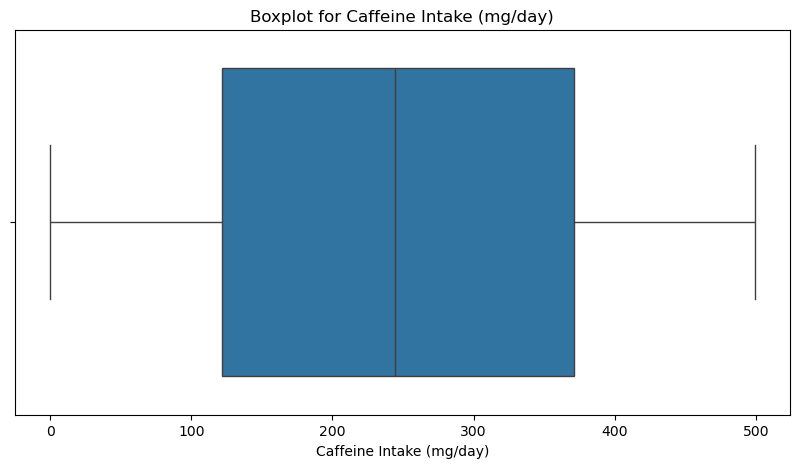

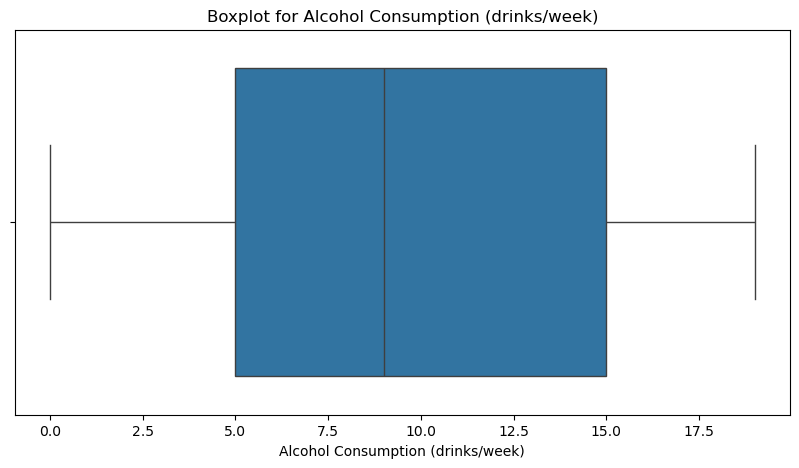

Number of outliers in 'Caffeine Intake': 0
Number of outliers in 'Alcohol Consumption': 0
Normalized data:
   Caffeine Intake (normalized)  Alcohol Consumption (normalized)
0                     -0.496232                         -0.605436
1                     -1.036095                         -0.605436
2                      1.524795                          0.781257
3                      1.552480                          1.127930
4                      0.811898                         -1.298782


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Caffeine Intake
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Caffeine Intake (mg/day)'])
plt.title('Boxplot for Caffeine Intake (mg/day)')
plt.show()

# Boxplot for Alcohol Consumption
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Alcohol Consumption (drinks/week)'])
plt.title('Boxplot for Alcohol Consumption (drinks/week)')
plt.show()

# Detect outliers using IQR
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

caffeine_outliers = detect_outliers('Caffeine Intake (mg/day)')
alcohol_outliers = detect_outliers('Alcohol Consumption (drinks/week)')

print(f"Number of outliers in 'Caffeine Intake': {len(caffeine_outliers)}")
print(f"Number of outliers in 'Alcohol Consumption': {len(alcohol_outliers)}")


# Initialize scaler
scaler = StandardScaler()

# Normalize Caffeine Intake
data['Caffeine Intake (normalized)'] = scaler.fit_transform(data[['Caffeine Intake (mg/day)']])

# Normalize Alcohol Consumption
data['Alcohol Consumption (normalized)'] = scaler.fit_transform(data[['Alcohol Consumption (drinks/week)']])

# Drop original columns if needed
data.drop(columns=['Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)'], inplace=True)

print("Normalized data:")
print(data[['Caffeine Intake (normalized)', 'Alcohol Consumption (normalized)']].head())



## Fabian's Processing

###### Age

In [132]:
Age = data['Age']
bins= [0,18,30,40,50,60,70]
groups = pd.cut(Age,bins)
groups.value_counts()
groups.describe

# One hot-encoding
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(groups.to_frame())
data = pd.concat([data,array], axis=1)
data.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,...,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10),"Age_(0, 18]","Age_(18, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]"
0,1,56,Female,Other,9.6,8.3,175,6,No,No,...,4,Yes,9,10,0.0,0.0,0.0,0.0,1.0,0.0
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,...,0,No,9,8,0.0,0.0,0.0,1.0,0.0,0.0
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,...,7,Yes,10,5,0.0,0.0,1.0,0.0,0.0,0.0
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,...,4,Yes,5,8,0.0,0.0,0.0,0.0,1.0,0.0
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,...,0,No,1,1,0.0,1.0,0.0,0.0,0.0,0.0


###### Gender

In [138]:
Gender = data['Gender']
# One hot-encoding
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(data[['Gender']])
data = pd.concat([data,array], axis=1)
data.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,...,Severity of Anxiety Attack (1-10),"Age_(0, 18]","Age_(18, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]",Gender_Female,Gender_Male,Gender_Other
0,1,56,Female,Other,9.6,8.3,175,6,No,No,...,10,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,...,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,...,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,...,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
###### Sleep Hours

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,...,"Age_(40, 50]","Age_(50, 60]","Age_(60, 70]",Gender_Female,Gender_Male,Gender_Other,x0,x0,Norm Sleep hr,Norm Sleep hr
0,1,56,Female,Other,9.6,8.3,175,6,No,No,...,0.0,1.0,0.0,1.0,0.0,0.0,0.942857,0.942857,0.942857,0.942857
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,...,1.0,0.0,0.0,0.0,1.0,0.0,0.485714,0.485714,0.485714,0.485714
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.557143,0.557143,0.557143,0.557143
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,...,0.0,1.0,0.0,0.0,1.0,0.0,0.885714,0.885714,0.885714,0.885714
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,...,0.0,0.0,0.0,0.0,1.0,0.0,0.885714,0.885714,0.885714,0.885714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,...,0.0,0.0,0.0,0.0,1.0,0.0,0.200000,0.200000,0.200000,0.200000
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.985714,0.985714,0.985714,0.985714
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.971429,0.971429,0.971429,0.971429
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,...,0.0,1.0,0.0,0.0,1.0,0.0,0.414286,0.414286,0.414286,0.414286


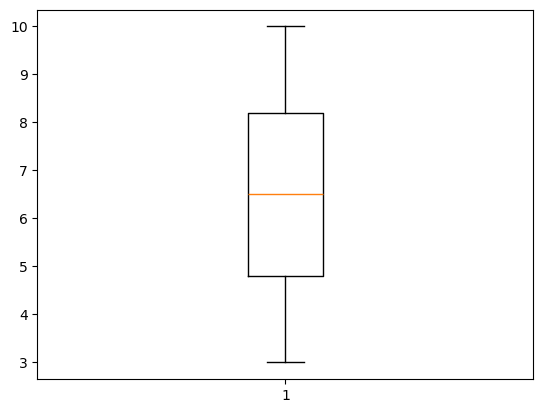

In [197]:
sleep = data['Sleep Hours']
plt.boxplot(sleep)
# no outliers then proceed to normalize
min_max = MinMaxScaler().set_output(transform='pandas')
normSleep = min_max.fit_transform(sleep.values.reshape(-1, 1))
normSleep = normSleep.rename(columns={normSleep.columns[0]: 'Norm Sleep hr'})
data = pd.concat([data, normSleep], axis=1)
data

In [ ]:
###### Physical Activity (hrs/week)

In [ ]:
activiy = data['Physical Activity (hrs/week)']
plt.boxplot(sleep)
# no outliers then proceed to normalize
min_max = MinMaxScaler().set_output(transform='pandas')
normSleep = min_max.fit_transform(sleep.values.reshape(-1, 1))
normSleep = normSleep.rename(columns={normSleep.columns[0]: 'Norm Sleep hr'})
data = pd.concat([data, normSleep], axis=1)
data